In [49]:
import torch
import matplotlib.pyplot as plt
import numpy as np 
import pickle 
import os
import glob
import cv2
import importlib 
import retrieval_module

from torchvision import transforms 
from build_vocab import Vocabulary
from PIL import Image
from pycocotools.coco import COCO

import model_files as models
importlib.reload(retrieval_module)


<module 'retrieval_module' from '/datasets/home/67/867/jojoy/Project/coco/image_captioning/retrieval_module.py'>

# Load model and other files

In [28]:
vocab_path = "./data/vocab.pkl"
# Load vocabulary wrapper
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)
    
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
# load encoder, decoder models
encoder1, decoder1 = retrieval_module.load_model(1, device, vocab)
encoder2, decoder2 = retrieval_module.load_model(2, device, vocab)
encoder3, decoder3 = retrieval_module.load_model(3, device, vocab)
encoder4, decoder4 = retrieval_module.load_model(4, device, vocab)
encoder5, decoder5 = retrieval_module.load_model(5, device, vocab)
print("models loaded")

# COCO dataset : dataset is either "val2014" or "train2014". 
# Corresponding temp_path is either  "./data/val2014" or "./data/train2014/
dataset = "val2014"
temp_path = "./data/val2014/"

# dataset = "train2014"
# temp_path = "./data/train2014/"
coco, caption_dict = retrieval_module.get_COCO_caption_dict(dataset)

models loaded
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


# View image captions

Model 1 =  a person on skis in the snow with a ski lift .
Model 2 =  a person on skis standing on a snowy mountain .
Model 3 =  a person on skis in the snow with a mountain in the background .
Model 4 =  a person on skis standing on a snowy slope .
Model 5 =  a person on skis going down a snowy hill .
Label =  Several people are cross country skiing on a trail


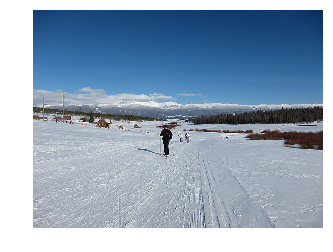

In [17]:
id_list = list(coco.anns.keys())
ann_id = id_list[np.random.randint(0, len(id_list ))]
caption = coco.anns[ann_id]['caption']
img_id = coco.anns[ann_id]['image_id']
image_path = temp_path+coco.loadImgs(img_id)[0]['file_name']

sentence1 = retrieval_module.get_captions(image_path, encoder1, decoder1, vocab, device, 1)
sentence2 = retrieval_module.get_captions(image_path, encoder2, decoder2, vocab, device, 1)
sentence3 = retrieval_module.get_captions(image_path, encoder3, decoder3, vocab, device, 1)
sentence4 = retrieval_module.get_captions(image_path, encoder4, decoder4, vocab, device, 1)
sentence5 = retrieval_module.get_captions(image_path, encoder5, decoder5, vocab, device, 1)

print ("Model 1 = ",sentence1 )
print ("Model 2 = ",sentence2 )
print ("Model 3 = ",sentence3 )
print ("Model 4 = ",sentence4 )
print ("Model 5 = ",sentence5 )
print("Label = ", coco.anns[ann_id]['caption'])

image = Image.open(image_path)
plt.imshow(np.asarray(image))
plt.axis("off")
plt.show()

# Retrieval based on images

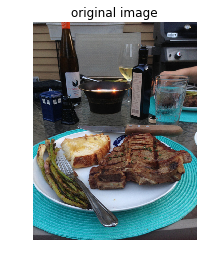

Label =  a white plate with some bread steak silverware and some asparagus


In [19]:
ann_id = id_list[np.random.randint(0, len(id_list ))]
caption = coco.anns[ann_id]['caption']
img_id = coco.anns[ann_id]['image_id']
image_path = temp_path+coco.loadImgs(img_id)[0]['file_name']
image = Image.open(image_path)
plt.imshow(np.asarray(image))
plt.title("original image")
plt.axis("off")
plt.show()
print("Label = ", caption)

	 Predicted caption :  a group of people on a beach with a kite .
	 Recommendations : 


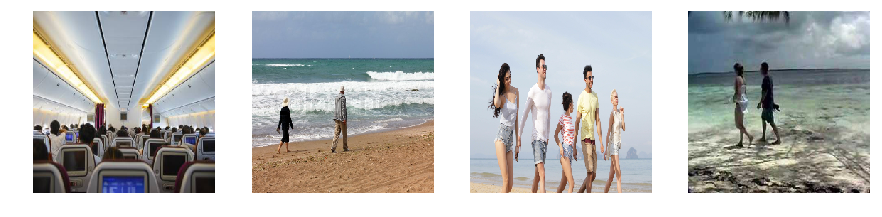

	 Predicted caption :  a man standing on a beach holding a surfboard .
	 Recommendations : 


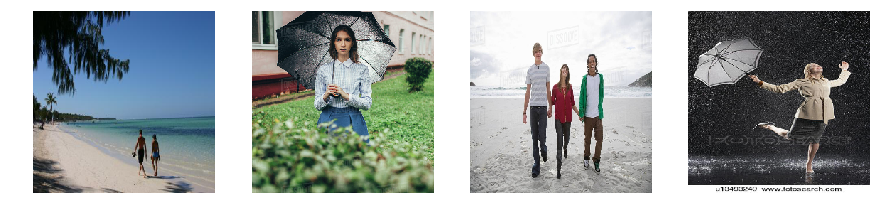

	 Predicted caption :  a man and a woman are standing on a beach .
	 Recommendations : 


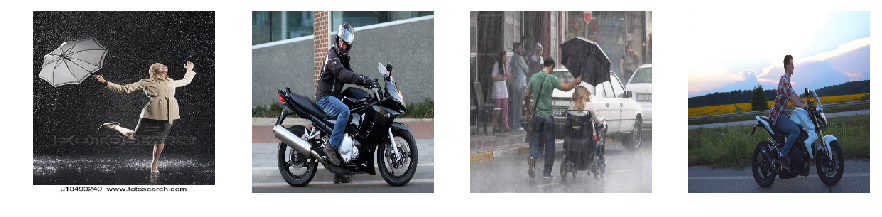

	 Predicted caption :  two people walking on the beach with surfboards .
	 Recommendations : 


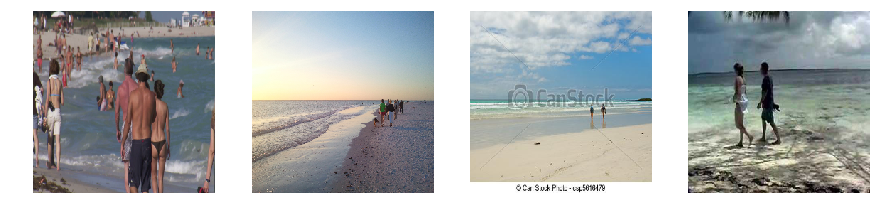

	 Predicted caption :  a man and a woman standing on a beach .
	 Recommendations : 


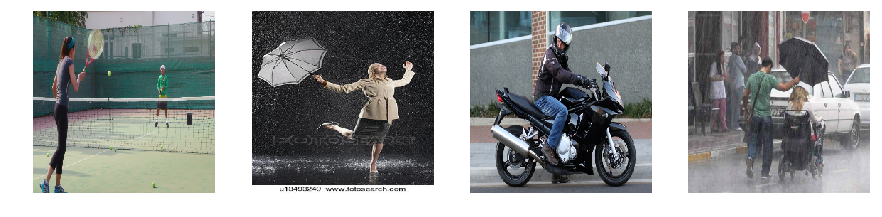

In [50]:
# set number of recommendations
num_reco = 4

# call models to generate recommendations
retrieval_module.retrieval_image(image_path, caption_dict,encoder1, decoder1, vocab,  device, dataset, num_reco )
retrieval_module.retrieval_image(image_path, caption_dict,encoder2, decoder2, vocab,  device, dataset, num_reco )
retrieval_module.retrieval_image(image_path, caption_dict,encoder3, decoder3, vocab,  device, dataset, num_reco )
retrieval_module.retrieval_image(image_path, caption_dict,encoder4, decoder4, vocab,  device, dataset, num_reco )
retrieval_module.retrieval_image(image_path, caption_dict,encoder5, decoder5, vocab,  device, dataset, num_reco )

# Retreival based on captions

Images similar to caption :  dog biting


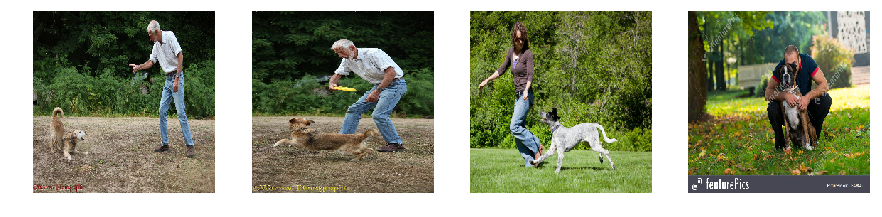

In [52]:
# set number of recommendations
num_reco = 4
input_caption = "dog biting"
retrieval_module.retrieval_caption(input_caption, caption_dict, dataset, num_reco)

# Retrieval based images from google images

In [40]:
with open("./data/google_images_annotations_18_Nov.pkl", "rb") as f:
    caption_dict = pickle.load(f)

caps, img_ids = [], []
for i,d in list(caption_dict.items()):
    caps.append(i)
    img_ids.append(d)
    
dataset = "google_images"
temp_path = "./data/google_images/"

Pictures Of People Walking On The Beach


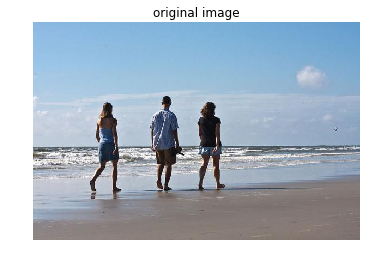

In [41]:
idx = np.random.randint(0, len(img_ids ))
img_id = img_ids[idx]
caption = caps[idx]
print(caption)
image_path = temp_path+ img_id
image = Image.open(image_path)
plt.imshow(np.asarray(image))
plt.title("original image")
plt.axis("off")
plt.show()

	 Predicted caption :  a group of people on a beach with a kite .
	 Recommendations : 


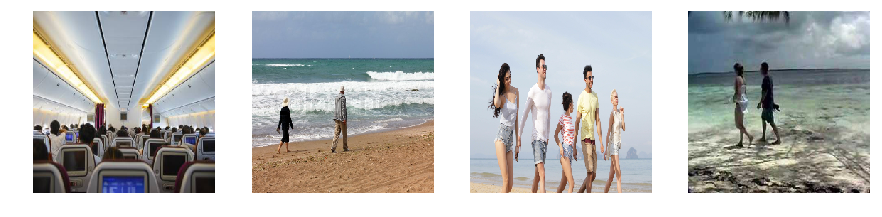

	 Predicted caption :  a man standing on a beach holding a surfboard .
	 Recommendations : 


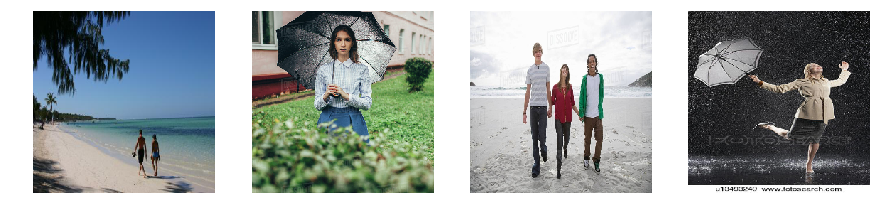

	 Predicted caption :  a man and a woman are standing on a beach .
	 Recommendations : 


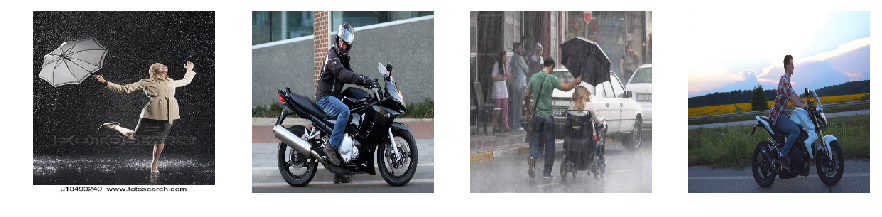

	 Predicted caption :  two people walking on the beach with surfboards .
	 Recommendations : 


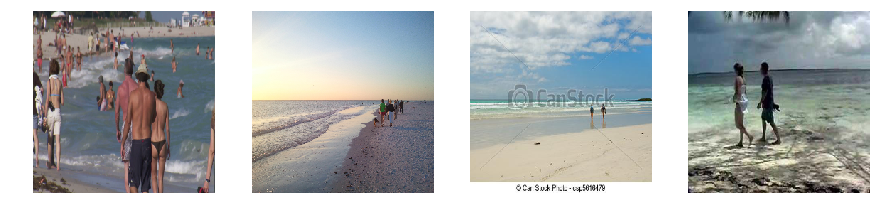

	 Predicted caption :  a man and a woman standing on a beach .
	 Recommendations : 


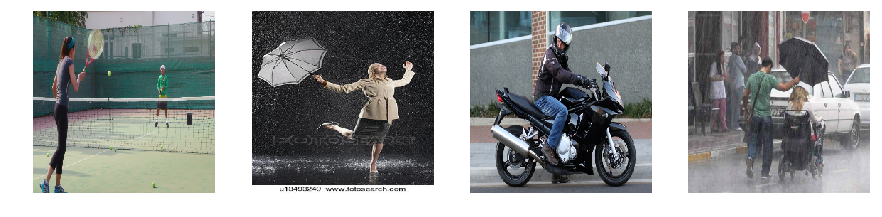

In [53]:
# set number of recommendations
num_reco = 4

# call models to generate recommendations
retrieval_module.retrieval_image(image_path, caption_dict,encoder1, decoder1, vocab,  device, dataset, num_reco)
retrieval_module.retrieval_image(image_path, caption_dict,encoder2, decoder2, vocab,  device, dataset, num_reco)
retrieval_module.retrieval_image(image_path, caption_dict,encoder3, decoder3, vocab,  device, dataset, num_reco)
retrieval_module.retrieval_image(image_path, caption_dict,encoder4, decoder4, vocab,  device, dataset, num_reco)
retrieval_module.retrieval_image(image_path, caption_dict,encoder5, decoder5, vocab,  device, dataset, num_reco)

Images similar to caption :  cat sitting


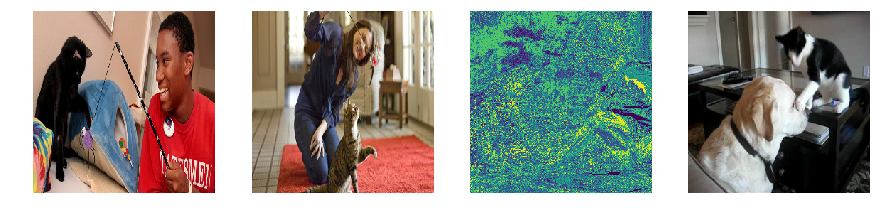

In [54]:
num_reco = 4
input_caption = "cat sitting"
retrieval_module.retrieval_caption(input_caption, caption_dict, dataset, num_reco)